In [1]:
from graphviz import Digraph

In [5]:
def e(a,b,label=None):
    global dot
    if label:
        dot.edge(a,b,label=label,color='blue')
    else:
        dot.edge(a,b,color='blue')

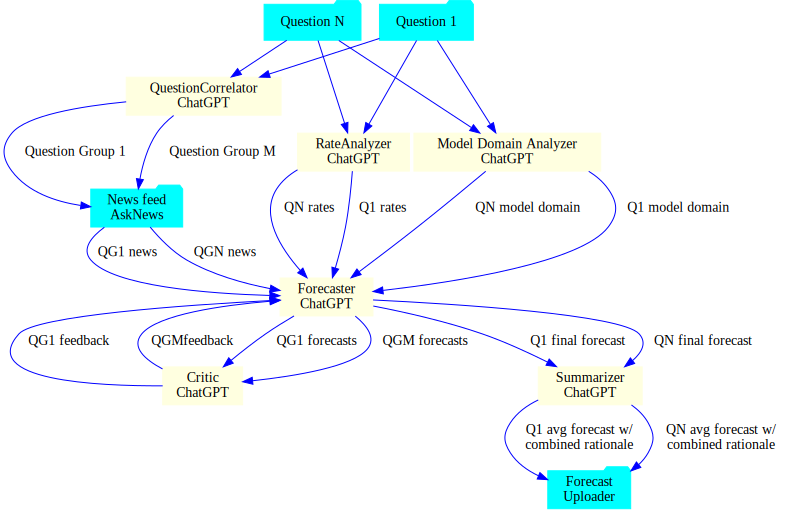

In [20]:
dot = Digraph(comment='LLM process flow')

dot.node('news', 'News feed\nAskNews', shape='folder', style='filled', color='aqua')
dot.node('ifp1', 'Question 1', shape='folder', style='filled', color='aqua')
dot.node('ifpN', 'Question N', shape='folder', style='filled', color='aqua')
dot.node('md', 'Model Domain Analyzer\nChatGPT', shape='box', style='filled', color='lightyellow')
dot.node('rho', 'QuestionCorrelator\nChatGPT', shape='box', style='filled', color='lightyellow')
dot.node('rate', 'RateAnalyzer\nChatGPT', shape='box', style='filled', color='lightyellow')
dot.node('fc', 'Forecaster\nChatGPT', shape='box', style='filled', color='lightyellow')
dot.node('critic', 'Critic\nChatGPT', shape='box', style='filled', color='lightyellow')
dot.node('sum', 'Summarizer\nChatGPT', shape='box', style='filled', color='lightyellow')
dot.node('upload', 'Forecast\nUploader', shape='folder', style='filled', color='aqua')

e('ifp1', 'md')
e('ifpN', 'md')
e('ifp1', 'rate')
e('ifpN', 'rate')
e('rate', 'fc', 'Q1 rates')
e('rate', 'fc', 'QN rates')
e('md', 'fc', 'Q1 model domain')
e('md', 'fc', 'QN model domain')
e('ifp1', 'rho')
e('ifpN', 'rho')
e('rho', 'news', 'Question Group 1')
e('rho', 'news', 'Question Group M')
e('news', 'fc', 'QG1 news')
e('news', 'fc', 'QGN news')
e('fc', 'critic', 'QG1 forecasts')
e('fc', 'critic', 'QGM forecasts')
e('critic', 'fc', 'QG1 feedback')
e('critic', 'fc', 'QGMfeedback')
e('fc', 'sum', 'Q1 final forecast')
e('fc', 'sum', 'QN final forecast')
e('sum', 'upload', 'Q1 avg forecast w/\ncombined rationale')
e('sum', 'upload', 'QN avg forecast w/\ncombined rationale')
dot.render('q3_flow', format='png')
dot